# Image Basics

Images are NumPy ndarrays.

In [9]:
from skimage.io import imread

image = imread("image1.jpg")

In [2]:
type(image)

numpy.ndarray

In [3]:
image.shape

(4000, 3000, 3)

In [4]:
image.ndim

3

In [5]:
image.size # 4000 * 3000 * 3

36000000

Retrieve the three colour channels by indexing.

In [12]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np

Compare two images side by side.

In [13]:
def compare(
    original,
    filtered,
    title_filtered="Filtered",
    cmap_type="gray",
    axis=False,
    title_original="Original",
):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)

    ax1.imshow(original, cmap=cmap_type)
    ax1.set_title(title_original)

    ax2.imshow(filtered, cmap=cmap_type)
    ax2.set_title(title_filtered)

    if not axis:
        ax1.axis("off")
        ax2.axis("off")
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0.01)
    plt.margins(0, 0)
    plt.show();

Show image from ndarray.

In [23]:
def show(image: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

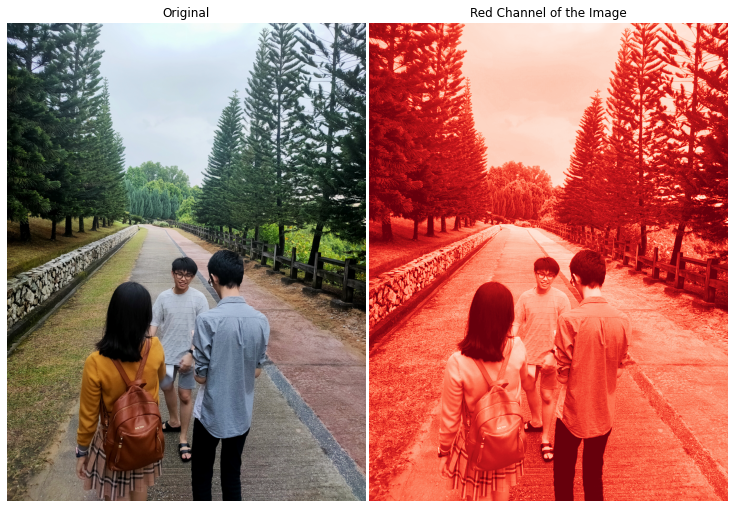

In [18]:
red = image[:,:,0]

compare(image, red, "Red Channel of the Image", cmap_type="Reds_r")

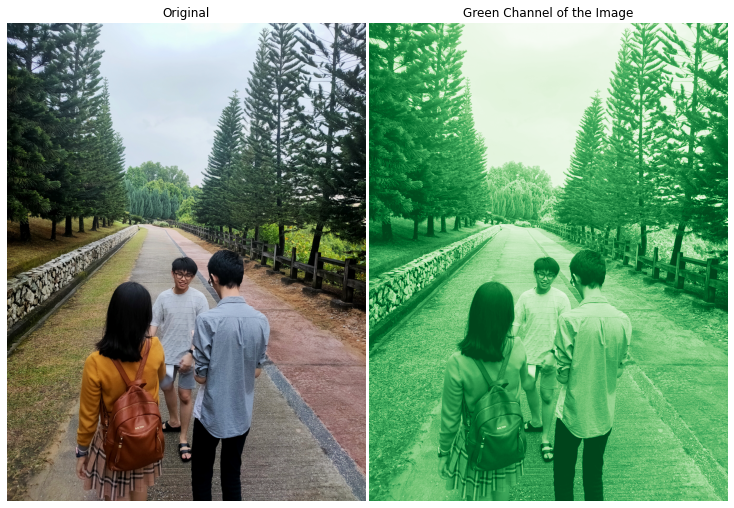

In [19]:
green = image[:,:,1]

compare(image, green, "Green Channel of the Image", cmap_type="Greens_r")

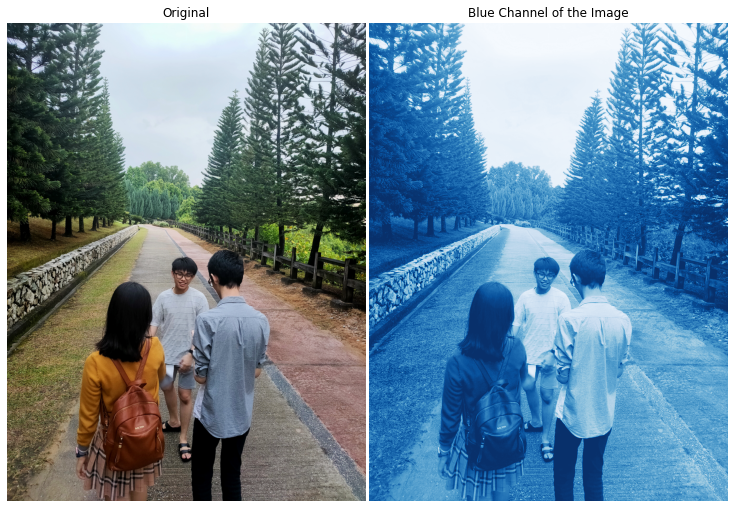

In [20]:
blue = image[:,:,2]

compare(image, blue, "Blue Channel of the Image", cmap_type="Blues_r")

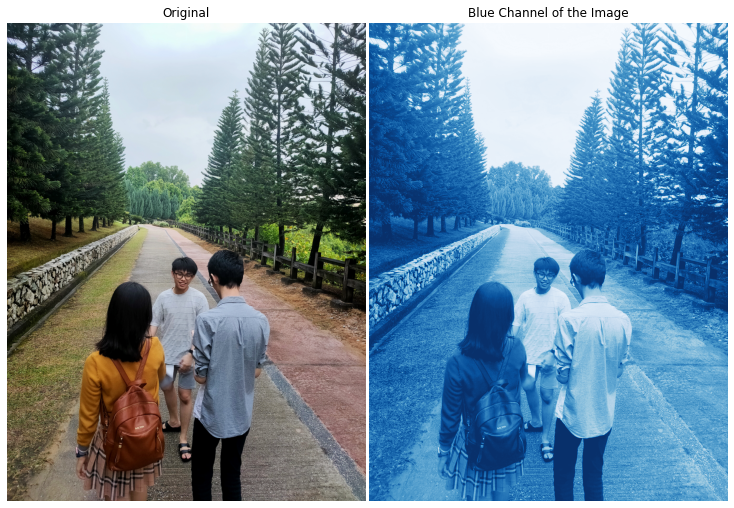

In [21]:
blue = image[1:,1:,2]

compare(image, blue, "Blue Channel of the Image", cmap_type="Blues_r")

The origin of images is locaed at (0,0), the top left.

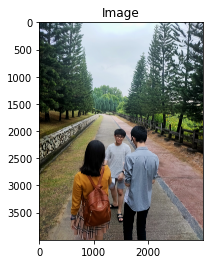

In [24]:
show(image, axis=True)

# Common Transformations

## Colour Images to Grayscale

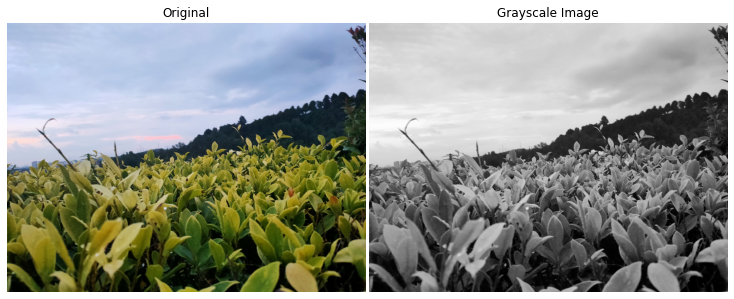

In [26]:
from skimage.color import rgb2gray

image = imread("image2.jpg")

gray = rgb2gray(image)

compare(image, gray, "Grayscale Image")

When images are converted to grayscale, they lose their 3rd dimension (the colour channel). Each cell in the image array represents an integer in `uint8` type (range 0 - 255 = 256 shades of gray).

In [27]:
gray.shape

(3000, 4000)

Can manipulate images by manipulating the NumPy array.

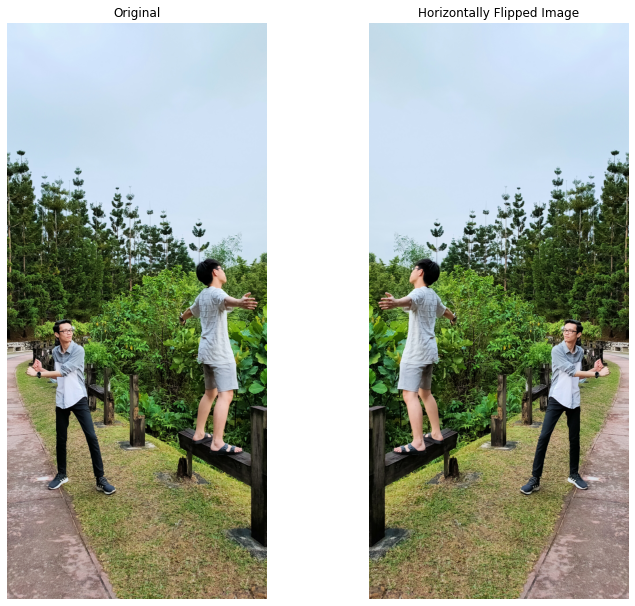

In [29]:
flip_image = imread("image3.jpg")
hori_flip = np.fliplr(flip_image)

compare(flip_image, hori_flip, "Horizontally Flipped Image")

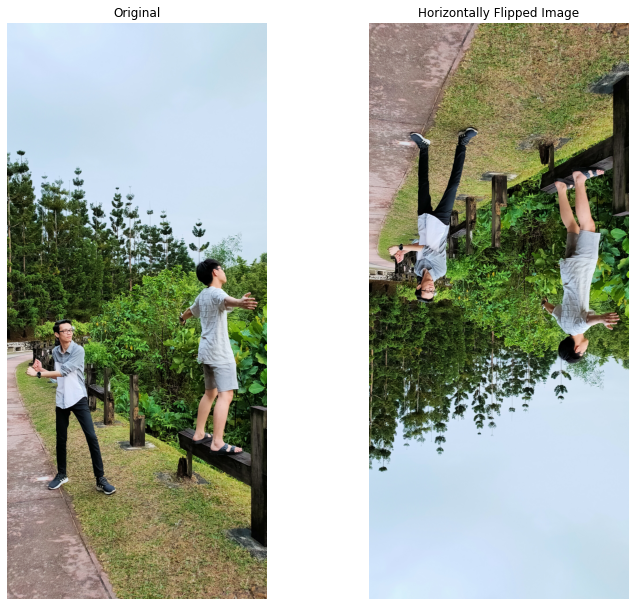

In [30]:
flip_image = imread("image3.jpg")
vert_flip = np.flipud(flip_image)

compare(flip_image, vert_flip, "Horizontally Flipped Image")

# Colour Channel Histograms

In [31]:
def plot_with_hist_channel(image, channel):
  
    channels = ["red", "green", "blue"]
    channel_idx = channels.index(channel)
    color = channels[channel_idx]

    extracted_channel = image[:, :, channel_idx]
    
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(18, 6)
    )

    ax1.imshow(image)
    ax1.axis("off")
    
    ax2.hist(extracted_channel.ravel(), bins=256, color=color)
    
    ax2.set_title(f"{channels[channel_idx]} histogram")

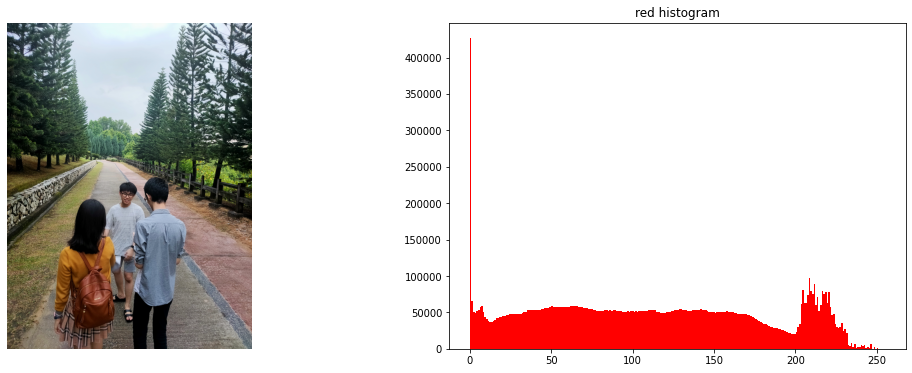

In [32]:
image1 = imread("image1.jpg")

plot_with_hist_channel(image1, "red")

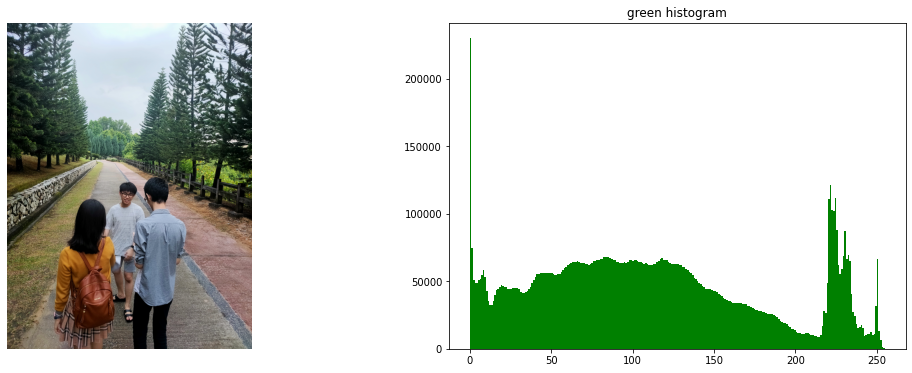

In [33]:
plot_with_hist_channel(image1, "green")

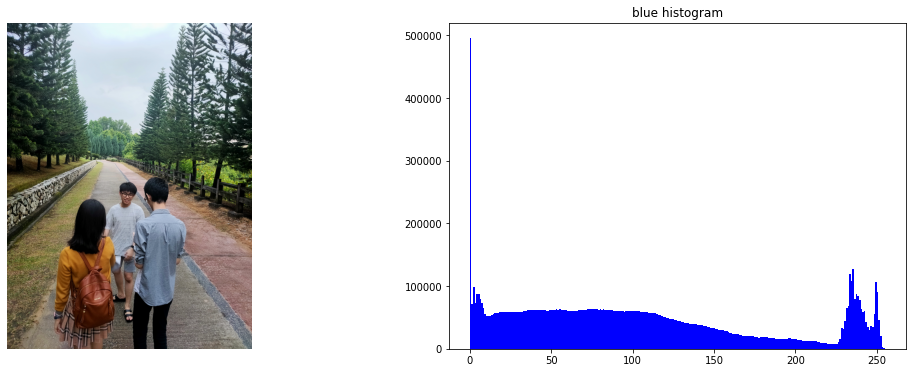

In [34]:
plot_with_hist_channel(image1, "blue")

(array([264181.,  64834.,  61693.,  50886.,  50694.,  63571.,  65328.,
         58642.,  48212.,  36159.,  30390.,  29004.,  29417.,  34617.,
         37701.,  41486.,  43748.,  44852.,  44988.,  43979.,  44352.,
         44547.,  46726.,  46343.,  46166.,  45145.,  45012.,  45955.,
         44765.,  43595.,  44268.,  45065.,  45336.,  47372.,  49145.,
         50795.,  51687.,  52533.,  51742.,  52416.,  53130.,  52425.,
         52334.,  53081.,  52856.,  52414.,  53109.,  54328.,  55488.,
         55816.,  56795.,  57247.,  57008.,  58700.,  59852.,  60295.,
         60156.,  59732.,  59040.,  59469.,  60638.,  60498.,  61156.,
         61452.,  60857.,  60677.,  60720.,  62421.,  62046.,  62335.,
         63057.,  63432.,  63272.,  64573.,  64464.,  64368.,  64076.,
         63671.,  64002.,  62556.,  63172.,  63470.,  63630.,  63644.,
         64365.,  64166.,  63143.,  63263.,  63252.,  63562.,  62685.,
         62610.,  62112.,  61959.,  61518.,  61235.,  60809.,  60308.,
      

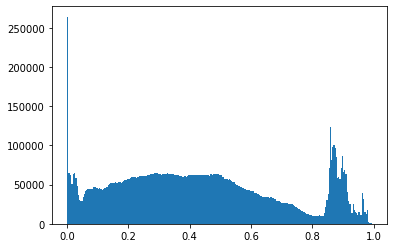

In [35]:
gray_image1 = rgb2gray(image1)

plt.hist(gray_image1.ravel(), bins=256)

Dark scenery will have lower pixel values.

# Filtering Images

## Manual Thresholding

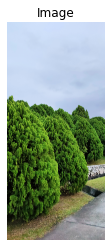

In [37]:
trees = imread("image4.jpg")

show(trees)